In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, UVFlag, utils
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle
from copy import deepcopy
import os

In [8]:
JDs = [str(i) for i in np.arange(2457548, 2457556)]
datadir = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/'
calfitsdir_jd = os.path.join(datadir, JDs[0])
calfitsfiles = glob(os.path.join(calfitsdir_jd, 'zen.*.uvcRP.calfits'))
calfitsfile = calfitsfiles[0]

In [10]:
uvc = UVCal()
uvc.read_calfits(calfitsfile)

In [52]:
def plot_gains(uvc, filename=None, re_im = False):
    
    freqs_MHz = uvc.freq_array.squeeze()/1e6
    
    xlabel = 'Frequency (MHz)'
    ylabels = [r'(Jy/corr unit)$^{1/2}$', r'(Jy/corr unit)$^{1/2}$', 'Radians,', 'Radians']
    
    plt.figure(figsize=(18,10))
    
    flagged_gains = 1./(uvc.gain_array/~uvc.flag_array)
    
    if re_im:
        functions = [np.real, np.real, np.imag, np.imag]
        ylim = [[-70,70], [-70,70], [-70,70], [-70,70]]
    else:
        functions = [np.abs, np.abs, np.angle, np.angle]
        ylim = [[0,100], [0,100], [-3.5,3.5], [-3.5,3.5]]
    
    for i in np.arange(4):
        plt.subplot(2,2,i+1)
        pol = i % 2
        for iant in np.arange(uvc.Nants_data):
            if uvc.flag_array[iant,0,:,:,0].mean() != 1:
                to_plot = functions[i](flagged_gains[iant,0,:,0,pol])
                    
                plt.plot(freqs_MHz, to_plot, label=uvc.ant_array[iant])
                
        plt.legend(loc='upper left')  
        plt.xlim([100,200])
        plt.ylim(ylim[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabels[i])
        
        
    if filename is not None:
        plt.savefig(filename)
        plt.close()
    else:
        plt.show()

divide by zero encountered in true_divide
invalid value encountered in true_divide


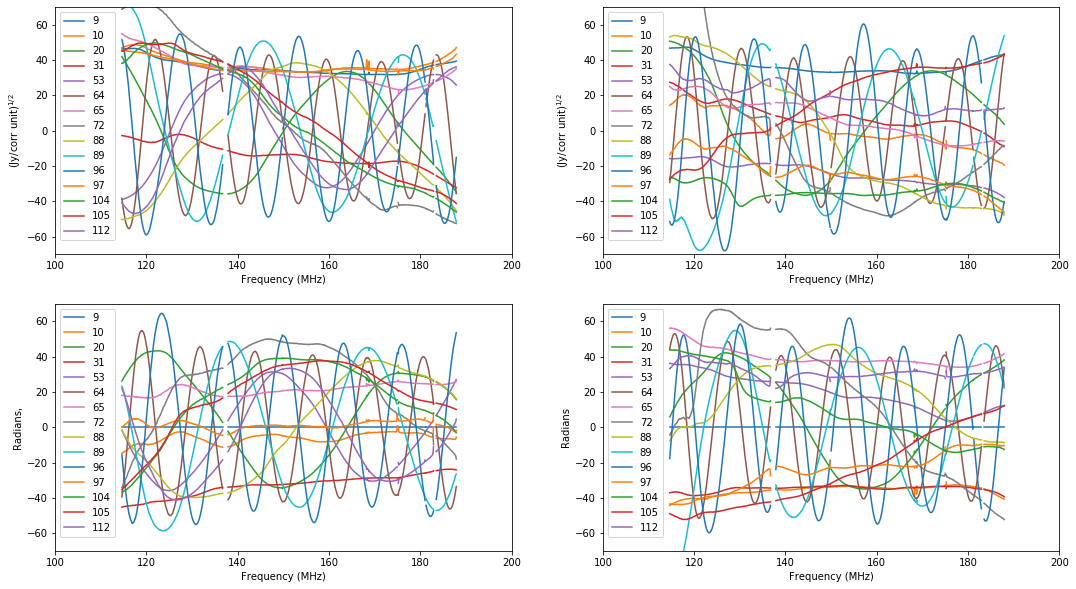

In [53]:
plot_gains(uvc, re_im = True)

In [59]:
from scipy.interpolate import CubicSpline

In [61]:
flags = ~uvc.flag_array[1,0,:,0,0].squeeze()
freqs = uvc.freq_array.squeeze()
cs = CubicSpline(freqs[flags], uvc.gain_array[1,0,flags,0,0])

divide by zero encountered in true_divide


(160, 180)

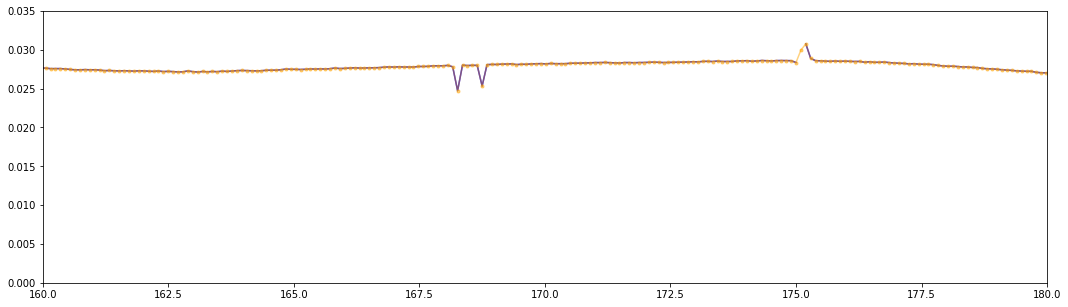

In [79]:
plt.figure(figsize=[18,5])
plt.plot(freqs/1e6, uvc.gain_array[1,0,:,0,0].real/~uvc.flag_array[1,0,:,0,0], color='blue')
plt.plot(freqs/1e6, cs(freqs).real,color='orange',alpha=0.5,marker='.')
plt.ylim([0,0.035])
plt.xlim([160,180])
#plt.plot(uvc.gain_array[1,0,:,0,0].imag/~uvc.flag_array[1,0,:,0,0])